# Modelos ML e distribuições

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
srn.set()
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import stats
import statistics

## Naïve Bayes e distribuições

### Bernoulli

In [3]:
from sklearn.naive_bayes import BernoulliNB

In [4]:
df_census = pd.read_csv('Bases de dados/census.csv')
print(df_census.shape)
df_census.head()

(32561, 15)


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_census['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

Variável X:

In [6]:
# categoricos - male/female
X = df_census['sex'].values
print(np.unique(X, return_counts=True))

# discreto 1, 0
label_encoder = LabelEncoder()
X = label_encoder.fit_transform(X)
print(np.unique(X, return_counts=True), end='\n\n')

print(X.shape)  # vetor
X = X.reshape(-1, 1)
print(X.shape)  # matriz

(array([' Female', ' Male'], dtype=object), array([10771, 21790], dtype=int64))
(array([0, 1]), array([10771, 21790], dtype=int64))

(32561,)
(32561, 1)


Variável y:

In [7]:
y = df_census['income'].values
y.shape

(32561,)

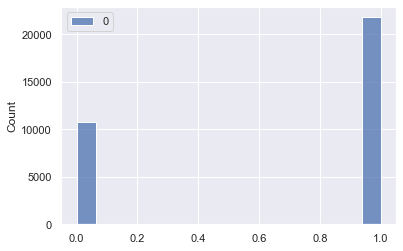

In [8]:
srn.histplot(X, kde=False);

(isso é tão errado, mas tudo bem né, só estamos 'testando')

In [9]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X, y)
previsoes = bernoulli_nb.predict(X)
previsoes.shape

(32561,)

In [10]:
accuracy_score(y, previsoes)

0.7591904425539756

### Multinomial

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
df_census.columns.values[[1, 3, 5, 6, 7, 8, 13]]

array(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country'], dtype=object)

In [13]:
X_census = df_census.iloc[:,[1, 3, 5, 6, 7, 8, 13]].values
y_census = df_census.iloc[:,14].values
X_census.shape, y_census.shape

((32561, 7), (32561,))

In [14]:
# Para cada atributo:

label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_country = LabelEncoder()

X_census[:,0] = label_encoder_workclass.fit_transform(X_census[:,0])
X_census[:,1] = label_encoder_education.fit_transform(X_census[:,1])
X_census[:,2] = label_encoder_marital.fit_transform(X_census[:,2])
X_census[:,3] = label_encoder_occupation.fit_transform(X_census[:,3])
X_census[:,4] = label_encoder_relationship.fit_transform(X_census[:,4])
X_census[:,5] = label_encoder_race.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_country.fit_transform(X_census[:,6])

In [15]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_census, y_census)
previsoes = multinomial_nb.predict(X_census)
previsoes.shape

(32561,)

In [16]:
accuracy_score(y_census, previsoes)

0.7485949448727005

## Algoritmo k-NN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

### Sem padronização

In [18]:
df_credit = pd.read_csv('Bases de dados/credit_data.csv')
df_credit.dropna(inplace=True)
print(df_credit.shape)
df_credit.head()

(1997, 5)


,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [19]:
X = df_credit.iloc[:,1:4].values
y = df_credit.iloc[:,4].values
X.shape, y.shape

((1997, 3), (1997,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
print(f'Treino: \n X: {X_train.shape} y: {y_train.shape}\n')
print(f'Teste: \n X: {X_test.shape} y: {y_test.shape}\n')

Treino: 
 X: (1597, 3) y: (1597,)

Teste: 
 X: (400, 3) y: (400,)



In [21]:
# Média, mediana e desvio padrão
print(f'Treino: {np.mean(X_train[0]), np.median(X_train[0]), np.std(X_train[0])}')
print(f'Teste: {np.mean(X_test[0]), np.median(X_test[0]), np.std(X_test[0])}')

Treino: (18018.215789099104, 5071.3718912882205, 21956.10795534022)
Teste: (10353.938187507958, 3827.8939146126, 12015.896328466857)


In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)
previsoes.shape

(400,)

In [23]:
accuracy_score(y_test, previsoes)

0.8275

### Com padronização

In [24]:
z_score_train = StandardScaler()
z_score_test = StandardScaler()

X_train_p = z_score_train.fit_transform(X_train)
X_test_p = z_score_test.fit_transform(X_test)

X_train_p.shape, X_test_p.shape

((1597, 3), (400, 3))

In [25]:
# Média, mediana e desvio padrão - padronizado
print(f'Treino: {np.mean(X_train_p), np.median(X_train_p), np.std(X_train_p)}')
print(f'Teste: {np.mean(X_test_p), np.median(X_test_p), np.std(X_test_p)}')

Treino: (4.686526915053051e-16, -0.035779259825647385, 1.0000000000000002)
Teste: (4.884981308350689e-17, -0.03615860408317491, 1.0000000000000002)


In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train_p, y_train)
previsoes_p = knn.predict(X_test_p)
previsoes_p.shape

(400,)

In [27]:
accuracy_score(y_test, previsoes_p)

0.97

Bem melhor!

## Dados enviesados e ML
- Utilizando Regressão Linear

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [29]:
df_houses = pd.read_csv('Bases de dados/house_prices.csv')
print(df_houses.shape)
df_houses.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


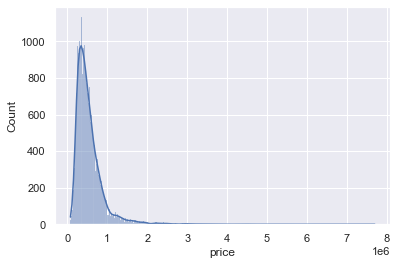

In [30]:
srn.histplot(df_houses['price'], kde=True);

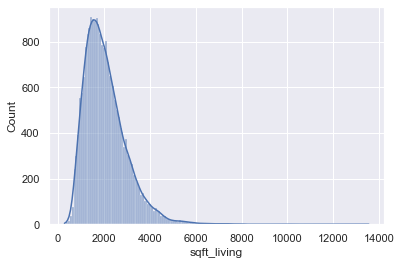

In [31]:
srn.histplot(df_houses['sqft_living'], kde=True);

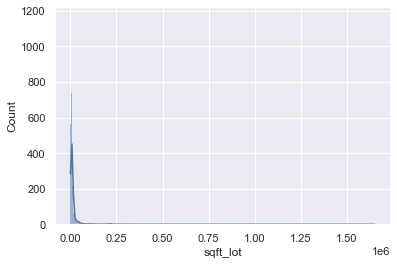

In [32]:
srn.histplot(df_houses['sqft_lot'], kde=True);

In [33]:
X = df_houses['sqft_living'].values.reshape(-1,1)  # matriz
y = df_houses['price'].values
X.shape, y.shape

((21613, 1), (21613,))

In [34]:
regressor = LinearRegression()
regressor.fit(X, y)
previsoes = regressor.predict(X)
previsoes.shape

(21613,)

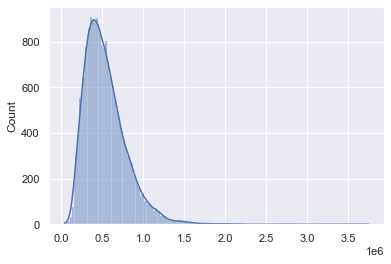

In [35]:
srn.histplot(previsoes, kde=True);

In [36]:
mean_absolute_error(y, previsoes)

173688.27335953107

In [37]:
r2_score(y, previsoes) # quanto mais próximo de 1, melhor o resultado

0.4928532179037931

### Com tratamento

In [38]:
X_novo = np.log(X)
y_novo = np.log(y)
X_novo.shape, y_novo.shape

((21613, 1), (21613,))

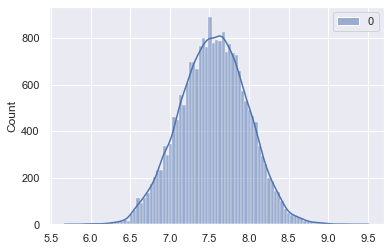

In [39]:
srn.histplot(X_novo, kde=True);  # se torna uma distribuição normal

In [40]:
regressor_novo = LinearRegression()
regressor_novo.fit(X_novo, y_novo)
previsoes_novo = regressor_novo.predict(X_novo)
previsoes_novo.shape

(21613,)

In [41]:
mean_absolute_error(y_novo, previsoes_novo)

0.314671784942507

In [42]:
r2_score(y_novo, previsoes_novo)

0.45550706431577015

## Redes Neurais

In [43]:
import tensorflow as tf
tf.__version__

'2.4.1'

### Inicializadores

In [44]:
from tensorflow.keras import initializers

#### Random Normal

In [45]:
normal = initializers.RandomNormal()
dados_normal = normal(shape=[1000])
dados_normal.shape

TensorShape([1000])

In [46]:
print(f'Média: {np.mean(dados_normal)}')
print(f'Mediana: {np.median(dados_normal)}')
print(f'Moda: {stats.mode(dados_normal)}')
print(f'Variância: {np.var(dados_normal)}')
print(f'Desvio Padrão: {np.std(dados_normal)}')

Média: 0.00023030770535115153
Mediana: -0.0011495428625494242
Moda: ModeResult(mode=array([-0.1715331], dtype=float32), count=array([1]))
Variância: 0.0024649305269122124
Desvio Padrão: 0.049648065119981766


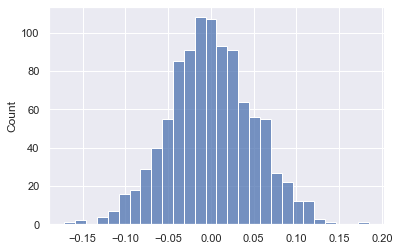

In [47]:
srn.histplot(dados_normal);

#### Random Uniform

In [48]:
uniforme = initializers.RandomUniform()
dados_uniforme = uniforme(shape=[1000])
dados_uniforme.shape

TensorShape([1000])

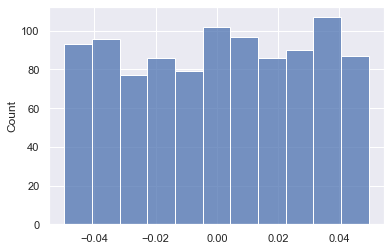

In [49]:
srn.histplot(dados_uniforme);

#### Glorot normal

- stddeb = sqrt(2 /(fan_in + fan_out)) 
- onde fan_in é o número de unidades de entrada

In [51]:
normal_glorot = initializers.GlorotNormal()
dados_normal_glorot = normal_glorot(shape=[1000])
dados_normal_glorot.shape

TensorShape([1000])

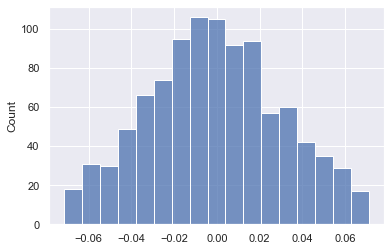

In [52]:
srn.histplot(dados_normal_glorot);

#### Glorot uniform

In [53]:
uniforme_glorot = initializers.GlorotUniform()
dados_uniforme_glorot = uniforme_glorot(shape=[1000])
dados_uniforme_glorot.shape

TensorShape([1000])

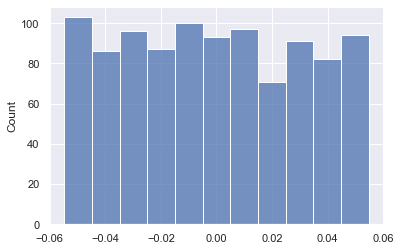

In [54]:
srn.histplot(dados_uniforme_glorot);

## Testes de normalidade